In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fastFM

plt.style.use("ggplot")

# Read datasets

In [25]:
# user info
u_cols = ["user_id","age","sex","occupation","zip-code"]
users = pd.read_csv("../data/ml-100k/u.user",sep="|",names=u_cols)

# rating info
r_cols = ["user_id","movie_id","rating","unix_timestamp"]
ratings = pd.read_csv("../data/ml-100k/u.data",sep="\t",names=r_cols)
ratings["date"] = pd.to_datetime(ratings.unix_timestamp,unit="s")

# movie meta info
m_cols = ["movie_id","title","release_date","video_release_date","imdb_url"]
movies = pd.read_csv("../data/ml-100k/u.item",sep="|",names=m_cols,usecols=range(5),encoding="latin1")

In [26]:
print(users.shape)
users.head()

(943, 5)


,user_id,age,sex,occupation,zip-code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [27]:
print(ratings.shape)
ratings.head()

(100000, 5)


,user_id,movie_id,rating,unix_timestamp,date
0,196,242,3,881250949,1997-12-04 15:55:49
1,186,302,3,891717742,1998-04-04 19:22:22
2,22,377,1,878887116,1997-11-07 07:18:36
3,244,51,2,880606923,1997-11-27 05:02:03
4,166,346,1,886397596,1998-02-02 05:33:16


In [28]:
print(movies.shape)
movies.head()

(1682, 5)


,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [29]:
# merge all info
movie_rating = pd.merge(movies,ratings)
lens = pd.merge(movie_rating,users)

Note: mergeの[参考](http://sinhrks.hatenablog.com/entry/2015/01/28/073327)

In [30]:
movie_rating.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,date
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,1998-02-17 17:28:52
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,5,875334088,1997-09-27 04:21:28
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,4,877019411,1997-10-16 16:30:11
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,4,891700426,1998-04-04 14:33:46
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,3,883601324,1997-12-31 20:48:44


In [31]:
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,date,age,sex,occupation,zip-code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,1998-02-17 17:28:52,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,1998-02-17 17:51:30,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,1998-02-17 18:20:08,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,1998-02-17 18:07:27,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,1998-02-17 17:31:36,60,M,retired,95076


## Summary

### movie

In [35]:
# 最も評価された回数の多い25作品のタイトル
lens.title.value_counts().head(25)

Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Titanic (1997)      

* 2000年以前の映画が多い。古い映画の方が評価人数が多いため？  
→映画ごとに評価の数と平均を集計し、平均値の高い順に並べてみる

Note: value_counts(): 頻度をカウントできる [参考](http://ailaby.com/dataframe_value_counts/)

In [44]:
# 評価の数と平均を集計
movie_stats = lens.groupby('title').agg({"rating":[np.size,np.mean]})
# 評価の平均で降順ソートして表示
movie_stats.sort_values(by=[("rating","mean")],ascending=False).head()

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

* 評価件数が１件しかなく平均値が高くなった映画が上位になってしまっている  
→評価件数が多いもののみで平均する

Note: groupby + agg: [グルーピング・集約処理](http://sinhrks.hatenablog.com/entry/2014/10/13/005327)
> また、集約関数を複数渡したい場合は .agg。列名 : 集約関数の辞書を渡すので、列ごとに集約関数を変えることもできる。

* 上記の場合、rating列をtitleで集約し、カウントと平均を行っている

In [51]:
# 100件以上評価されているタイトルのみに絞る
atleast_100 = movie_stats["rating"]["size"] >= 100
movie_stats[atleast_100].sort_values(by=[("rating","mean")],ascending=False).head(15)

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

### user

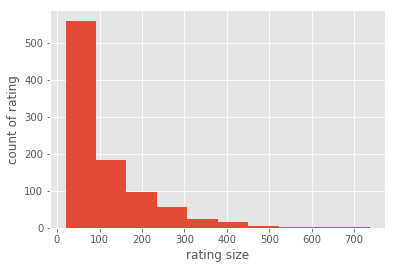

In [58]:
# 評価回数の分布
lens.groupby("user_id").size().sort_values(ascending=False).hist()
plt.xlabel("rating size")
plt.ylabel("count of rating")

* 沢山のタイトルを評価しているユーザーは少なく、逆も然り(ジップの法則)

In [62]:
# ユーザーごとの評価数と評価値の平均
user_stats = lens.groupby("user_id").agg(dict(rating=[np.size,np.mean]))
user_stats.rating.describe()

,size,mean
count,943.000000,943.000000
mean,106.044539,3.588191
std,100.931743,0.445233
min,20.000000,1.491954
25%,33.000000,3.323054
50%,65.000000,3.620690
75%,148.000000,3.869565
max,737.000000,4.869565


* 評価値の平均が1.49と辛口のユーザーもいれば、4.87と甘口のユーザーも居る

## Recommendation

* fastFMを利用(Factorizaton Machineのパッケージ)

### 使用例

In [67]:
#FMの入力は、ユーザーIDとアイテムIDはカテゴリ変数として考え、ダミー変数に変換する必要がある
from sklearn.feature_extraction import DictVectorizer


train = [
    # カテゴリ変数化したい要素は文字列に変換する
    dict(user="1",item="5",age=19),
    dict(user="2",item="43",age=33),
    dict(user="3",item="20",age=55),
    dict(user="4",item="10",age=20)
]

dv = DictVectorizer()
X = dv.fit_transform(train)  # sparse format
X.toarray()

array([[ 19.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.],
       [ 33.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.],
       [ 55.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.],
       [ 20.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]])

In [71]:
from fastFM import als

y = np.array([5,1,2,4],dtype=float)
fm = als.FMRegression(n_iter=1000,init_stdev=0.1,rank=2,l2_reg_w=0.1,l2_reg_V=0.5)
fm.fit(X,y)
# 24歳のユーザーがアイテム10を評価した場合のレート予測
fm.predict(dv.transform(dict(user="5",item="10",age=24)))

array([ 3.60775939])

### Movie Lensデータセットでの実践

In [4]:
def load_data(filename,path="../data/ml-100k/"):
    data = []
    y = []
    with open(path+filename) as f:
        for line in f:
            (user,movieid,rating,ts) = line.split("\t")
            data.append(dict(user_id=str(user),movie_id=str(movieid)))
            y.append(float(rating))
    return data,np.array(y)

In [5]:
# 読み込み
dev_data,y_dev = load_data("ua.base")
test_data,y_test = load_data("ua.test")

In [6]:
dev_data[:5]  # Note: 文字列に変換済み

[{'movie_id': '1', 'user_id': '1'},
 {'movie_id': '2', 'user_id': '1'},
 {'movie_id': '3', 'user_id': '1'},
 {'movie_id': '4', 'user_id': '1'},
 {'movie_id': '5', 'user_id': '1'}]

In [7]:
y_dev[:5]

array([ 5.,  3.,  4.,  3.,  3.])

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

v = DictVectorizer()
X_dev = v.fit_transform(dev_data)
X_test = v.transform(test_data)

# 開発用データをパラメータ調整用に分割
X_train,X_dev_test,y_train,y_dev_test = \
    train_test_split(X_dev,y_dev,test_size=.1,random_state=42)

In [9]:
X_train.shape

(81513, 2623)

In [11]:
# MCMCで予測
from sklearn.metrics import mean_squared_error
from fastFM import mcmc
from tqdm import tqdm

# fastFMのハイパーパラメータ
n_iter = 300
step_size = 1  # 1の場合、MCMCのサンプリングは間引かない
seed = 123
rank = 4

# 回帰モデルの初期化
fm = mcmc.FMRegression(n_iter=0,rank=rank,random_state=seed)
fm.fit_predict(X_train,y_train,X_dev_test)

# メモリ確保
rmse_dev_test = []
rmse_test = []
hyper_param = np.zeros((n_iter-1, 3 + 2 * rank),dtype=float)

# n_iter回だけサンプリング
for nr, i in enumerate(tqdm(range(1,n_iter))):
    fm.random_state = i*seed
    # n_more_iter回だけ追加でサンプリングする
    y_pred = fm.fit_predict(X_train,y_train,X_dev_test,n_more_iter=step_size)
    # その時のRMSE
    rmse_test.append(np.sqrt(mean_squared_error(y_pred,y_dev_test)))
    # その時のハイパーパラメータの値
    hyper_param[nr,:] = fm.hyper_param_
    
# burn-in用のインデックスを作成
values = np.arange(1,n_iter)
x = values * step_size
burn_in = 5
x = x[burn_in:]

100%|██████████| 299/299 [00:14<00:00, 20.42it/s]


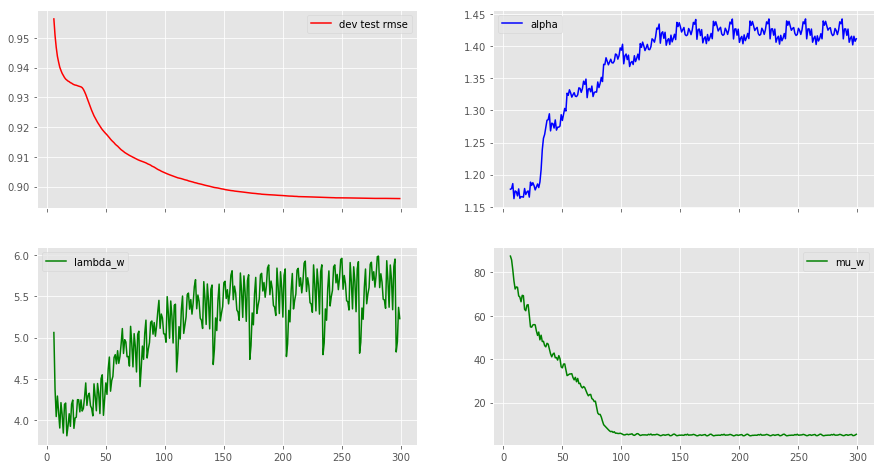

In [12]:
# RMSEとハイパーパラメータのプロット
f,ax = plt.subplots(2,2,sharex=True,figsize=(15,8))
ax[0,0].plot(x,rmse_test[burn_in:],label="dev test rmse",color="r")
ax[0,0].legend()
ax[0,1].plot(x,hyper_param[burn_in:,0],label="alpha",color="b")
ax[0,1].legend()
ax[1,0].plot(x,hyper_param[burn_in:,1],label="lambda_w",color="g")
ax[1,0].legend()
ax[1,1].plot(x,hyper_param[burn_in:,3],label="mu_w",color="g")
ax[1,1].legend()

In [93]:
# 検証データの標準偏差（＝常に平均値を出力するモデルのRMSE。モデルの良さのベンチマーク）
np.std(y_dev_test)

1.1189348256323237

* 各パラメータはn_iter=300で収束している様子
* RMSEは0.90未満で、検証データの標準偏差(1.12)を下回っている

### rankを変えて性能比較

In [32]:
n_iter = 100
seed = 333

rmse_test = []
ranks = [4,8,16,32,64]

for rank in ranks:
    fm = mcmc.FMRegression(n_iter=n_iter,rank=rank,random_state=seed)
    y_pred = fm.fit_predict(X_train,y_train,X_dev_test)
    rmse = np.sqrt(mean_squared_error(y_pred,y_dev_test))
    rmse_test.append(rmse)
    print("rank:{}\trmse:{:.3f}".format(rank,rmse))
    
plt.plot(ranks,rmse_test,label="dev test rmse",color="r")
plt.legend()

rank:4	rmse:0.903
rank:8	rmse:0.898


KeyboardInterrupt: 

#### テストデータでの評価

In [111]:
# まずはそのまま
fm = mcmc.FMRegression(n_iter = 300,rank=32,random_state=seed)
y_pred = fm.fit_predict(X_train,y_train,X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

0.92072254252202301

In [112]:
# ユーザーごとの評価値を標準化してから
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y_train_norm = scaler.fit_transform(y_train.reshape(-1,1)).ravel()
fm = mcmc.FMRegression(n_iter=300,rank=32,random_state=seed)
y_pred = fm.fit_predict(X_train,y_train_norm,X_test)
np.sqrt(mean_squared_error(scaler.inverse_transform(y_pred),y_test))

0.92071033216923892

#### ユーザーと映画以外のコンテキストを加える

In [34]:
lens["user_id"] = lens["user_id"].astype(str)
lens["movie_id"] = lens["movie_id"].astype(str)
lens["year"] = lens["date"].apply(str).str.split("-").str.get(0)
lens["release_year"] = lens["release_date"].apply(str).str.split("-").str.get(2)
lens["year"] = lens["date"].apply(str).str.split("-").str.get(0)
lens["release_year"] = lens["release_date"].apply(str).str.split("-").str.get(2)

In [36]:
# 候補の組み合わせ
candidate_columns = [
    ["user_id","movie_id","release_year","age","sex","year","rating"],
    ["user_id","movie_id","age","sex","year","rating"],
    ["user_id","movie_id","sex","year","rating"],
    ["user_id","movie_id","age","sex","rating"],
    ["user_id","movie_id","rating"],
]

In [39]:
from sklearn.preprocessing import StandardScaler
rmse_test = []

for column in candidate_columns:
    # 欠損値削除
    filtered_lens = lens[column].dropna()
    # 入力データをダミー変数に変換
    v = DictVectorizer()
    X_more_feature = v.fit_transform(
        list(filtered_lens.drop("rating",axis=1).T.to_dict().values()))
    y_more_feature = filtered_lens["rating"].tolist()
    
    # 教師データの学習用と評価用の分割
    X_mf_train,X_mf_test,y_mf_train,y_mf_test = train_test_split(
        X_more_feature,y_more_feature,test_size=.1,random_state=42)
    
    # ratingの正規化
    scaler = StandardScaler()
    y_mf_train_norm = scaler.fit_transform(np.array(y_mf_train)).ravel()
    
    # MCMCを使ったモデルの学習
    fm = mcmc.FMRegression(n_iter=500,rank=8,random_state=123)
    fm.fit_predict(X_mf_train,y_mf_train_norm,X_mf_test)
    
    # テストデータでの予測結果のRMSE取得
    y_pred = fm.fit_predict(X_mf_train,y_mf_train_norm,X_mf_test)
    rmse = np.sqrt(
        mean_squared_error(scaler.inverse_transform(y_pred),y_mf_test))
    rmse_test.append(rmse)

/Users/apple/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/apple/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/apple/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnin

(0.88, 0.9)

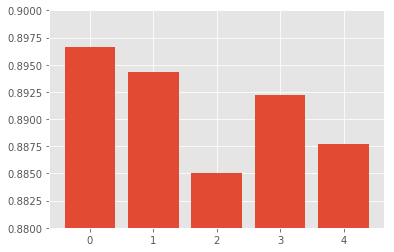

In [40]:
# RMSE plot
ind = np.arange(len(rmse_test))
bar = plt.bar(ind,height=rmse_test)
plt.ylim((0.88,0.90))

### Matrix Factorization (NMF)

In [16]:
from sklearn.decomposition import NMF

In [17]:
# 行：ユーザーID、列：映画ID
table = ratings.pivot(values="rating",index="user_id",columns="movie_id")
# 欠測値は0埋め
table[pd.isna(table)] = 0
table

NameError: name 'ratings' is not defined

In [154]:
table_train,table_test = \
    train_test_split(table,test_size=0.1,random_state=42)

In [159]:
nmf = NMF(n_components=30,random_state=seed).fit(table_train)
table_test_pred = nmf.transform(table_test)

In [149]:
nmf = NMF(n_components=30).fit()

In [24]:
X_train.toarray()[:,0]

351.0